# Statistical Process Control (SPC) Algorithm

## 1 - SPC Overview

...theoretical introduction to SPC......

## 2- SPC Algorithm Implementation

...present the module implementation...

## 3 - Example Usage

### 3.1 - Data

...brief presentation of our data...

### 3.2 - User Manual

#### Setup:
- Download the SPC_module folder from https://github.com/miguelFigSilva/dsm_SPC
- Install the requirements (pip install -r SPC_module/requirements.txt)

Once the setup is completed, we can start using the module.

#### Initialization:
- Import the required packages (including the SPC module)

In [4]:
from SPC_module.SPC import SPCAlgorithm
from river import compat
from river import metrics
from river import preprocessing
from sklearn import linear_model
import pandas as pd
import os
import warnings

warnings.filterwarnings("ignore")

- Create a function that initializes an estimator (machine learning model) of the user's choice. This estimator learning phase is the process we want to control using the SPC module.
    - Remark: The user shall ensure that the chosen estimator is compatible with the river package. 
    - Hint: there are available functions that help with this, e.g. river.compat.convert_sklearn_to_river().

In [2]:
def init_estimator_SGDClassifier():
    model = preprocessing.StandardScaler()
    model |= compat.convert_sklearn_to_river(
    estimator=linear_model.SGDClassifier(
        loss='log_loss',                   # 'log_loss' gives LOGISTIC REGRESSION. Uncomment to use it.
        #loss='hinge',                     # 'hinge' gives a LINEAR SVM. Uncomment to use it.
        #loss='perceptron',                # 'perceptron' is the linear loss used by the PERCEPTRON algorithm. Uncomment to use it.
        #loss='modified_huber',            # 'modified_huber' is another smooth loss that brings tolerance to outliers as well as probability estimates. Uncomment to use it.
        #loss='squared_hinge',             # 'squared_hinge' is like hinge but is quadratically penalized. Uncomment to use it.
        eta0=0.01,
        learning_rate='constant'
    ),
    classes=[False, True]
    )
    return model

- Get the data stream
- Initialize the SPC detector
- Initialize the metrics

In [ ]:
PATH = os.path.dirname(os.path.abspath('__file__'))
data_stream = pd.read_csv(f"{PATH}/data/synthetic_dataset.csv")

spc_detector = SPCAlgorithm(init_estimator_SGDClassifier)

metric = metrics.Accuracy()

#### Running the Algorithm:

Once initialized, the SPC algorithm can run on the data stream. It will monitor the learning process of the chosen estimator and detect any anomalies or drifts.

- Implement the control loop

1000 samples: Accuracy: 76.00%
2000 samples: Accuracy: 76.25%
3000 samples: Accuracy: 77.33%
4000 samples: Accuracy: 77.70%
5000 samples: Accuracy: 77.62%
6000 samples: Accuracy: 77.38%
7000 samples: Accuracy: 77.46%
8000 samples: Accuracy: 77.40%
9000 samples: Accuracy: 77.51%
10000 samples: Accuracy: 77.51%
10000 samples: Accuracy: 77.51%


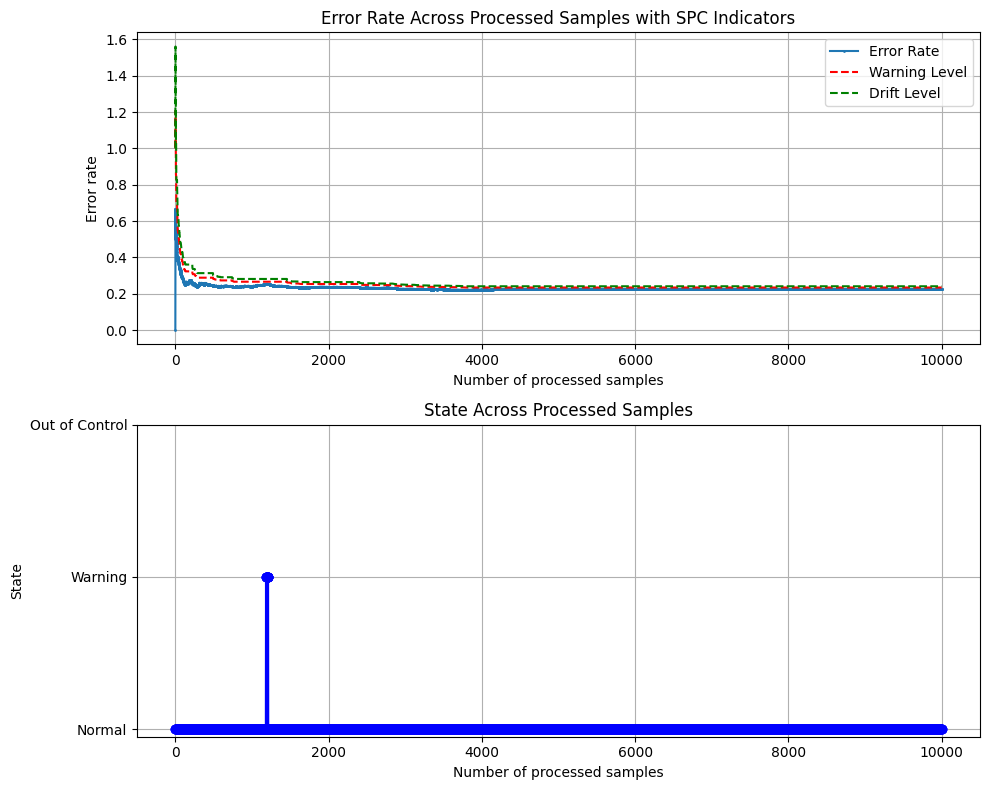

In [3]:


report = 1000
warn = -1
retrain = -1
for i in range(data_stream.shape[0]):
    status, y, y_pred = spc_detector.model_control(data_stream, i)        
    metric.update(y, y_pred)

    if (i+1)%report == 0: 
        print(f'{i+1} samples:', metric)

    if status == 'Warning Level' and warn == -1 and i!=0:
        warn = i
        retrain = -1
        #print(f'Warning after {i+1} samples')
    elif status == 'Out-control' and retrain == -1 and i!=0:
        #print(f'Re-train model after {i+1} samples')
        retrain = i
        warn = -1
    else:
        warn = -1
        retrain = -1

print(f'{i+1} samples:', metric)

# Plotting
spc_detector.process_plot()

## 4 - Findings and Conclusions

...present our analysis to the performance with different ML models, etc...